## Terrorism Hotspot
Imagine you are a security or defense analyst. Analyze the data and draw conclusions on the distribution and nature of terrorist incidents recorded around the world. In your analysis, include maps that visualize the location of different incidents. Your analysis may also provide answers to the following questions:

#### How has the number of terrorist activities changed over the years? 
#### Are there certain regions where this trend is different from the global averages?
#### Is the number of incidents and the number of casualties correlated? 
#### What are the most common methods of attacks? 
#### Does it differ in various regions or in time?



### Data Description
The provided compressed file globalterrorismdb_0718dist.tar.bz2 is an extract from the Global Terrorism Database (GTD) - an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.

Since the number of variables and instances is very large, for this project, feel free to select a subset of columns or a specific timeframe.

### Explanation of selected columns:

###### success - Success of a terrorist strike
###### suicide - 1 = "Yes" The incident was a suicide attack. 0 = "No" There is no indication that the incident was a suicide
###### attacktype1 - The general method of attack
###### attacktype1_txt - The general method of attack and broad class of tactics used.
###### targtype1_txt - The general type of target/victim
###### targsubtype1_txt - The more specific target category
###### target1 - The specific person, building, installation that was targeted and/or victimized
###### natlty1_txt - The nationality of the target that was attacked
###### gname - The name of the group that carried out the attack
###### gsubname - Additional details about group that carried out the attack like fractions
###### nperps - The total number of terrorists participating in the incident
###### weaptype1_txt - General type of weapon used in the incident
###### weapsubtype1_txt - More specific value for most of the Weapon Types
###### nkill - The number of total confirmed fatalities for the incident
###### nkillus - The number of U.S. citizens who died as a result of the incident

In [154]:
## All imports

import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [155]:
for file in os.listdir('./'):
    print (file)

terrorism_data = pd.read_csv('globalterrorismdb_0718dist.tar.bz2', compression='bz2')


.ipynb_checkpoints
globalterrorismdb_0718dist.tar.bz2
Incidents vs Casualities.png
map.png
Terrorism_analysis.ipynb
terrorism_checkpoint1.csv


C:\Users\rajchand\AppData\Local\Temp\ipykernel_25912\997871465.py:4: DtypeWarning: Columns (5,7,32,34,62,63,64,77,80,91,93,95,97,115,116,122) have mixed types. Specify dtype option on import or set low_memory=False.
  terrorism_data = pd.read_csv('globalterrorismdb_0718dist.tar.bz2', compression='bz2')


In [156]:
terrorism_data.head()

,Unnamed: 0,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [157]:
#terrorism_data.describe()
#terrorism_data.info()

#First checkpoint 

terrorism_data.to_csv('terrorism_checkpoint1.csv', index = False)

### How has the number of terrorist activities changed over the years? 

In [158]:
yearly_terrorism = pd.DataFrame()
yearly_terrorism = terrorism_data.groupby('iyear', as_index=False).agg({'eventid':'count'})
yearly_terrorism['Yearly Change'] = yearly_terrorism['eventid'].diff()
yearly_terrorism.rename(columns={'eventid':'No of incidents', 'iyear':'Year'}, inplace=True)

yearly_terrorism
#yearly_terrorism.merge(yerly_chg, on='iyear',how='inner')

,Year,No of incidents,Yearly Change
0,1970,651,NaN
1,1971,471,-180.0
2,1972,568,97.0
3,1973,473,-95.0
4,1974,581,108.0
5,1975,740,159.0
6,1976,923,183.0
7,1977,1319,396.0
8,1978,1526,207.0
9,1979,2662,1136.0


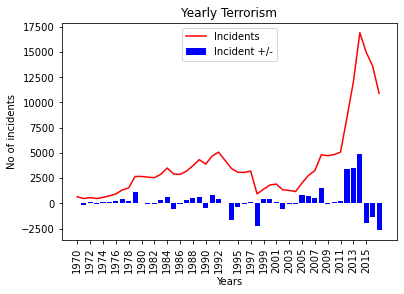

In [159]:
year = yearly_terrorism.Year
no_of_incident = yearly_terrorism['No of incidents']
yearly_chg = yearly_terrorism['Yearly Change']

plt.plot(year, no_of_incident, color='red', label='Incidents')
plt.bar(year, yearly_chg, color='Blue', label='Incident +/-')

plt.title('Yearly Terrorism')
plt.xlabel('Years')
plt.ylabel('No of incidents')

plt.xticks([year[index] for index in range(0,len(year)-1, 2)] , rotation=90)

plt.legend()
plt.show()

### Are there certain regions where this trend is different from the global averages?

In [160]:
#Year starting 2010 - 2014 the number of incidents skyrocketed peaking during 2014

Country_terrorism = terrorism_data[['eventid','iyear','imonth','iday','country_txt','country' ,'region', 'region_txt']]

In [161]:
region_analysis = Country_terrorism.groupby(['region_txt','iyear'], as_index=False).agg({'eventid':'count'}).sort_values(['region_txt','iyear'])

In [162]:
region_analysis.rename(columns={'region_txt':'region', 'iyear':'year', 'eventid':'no_of_inc'}, inplace=True)

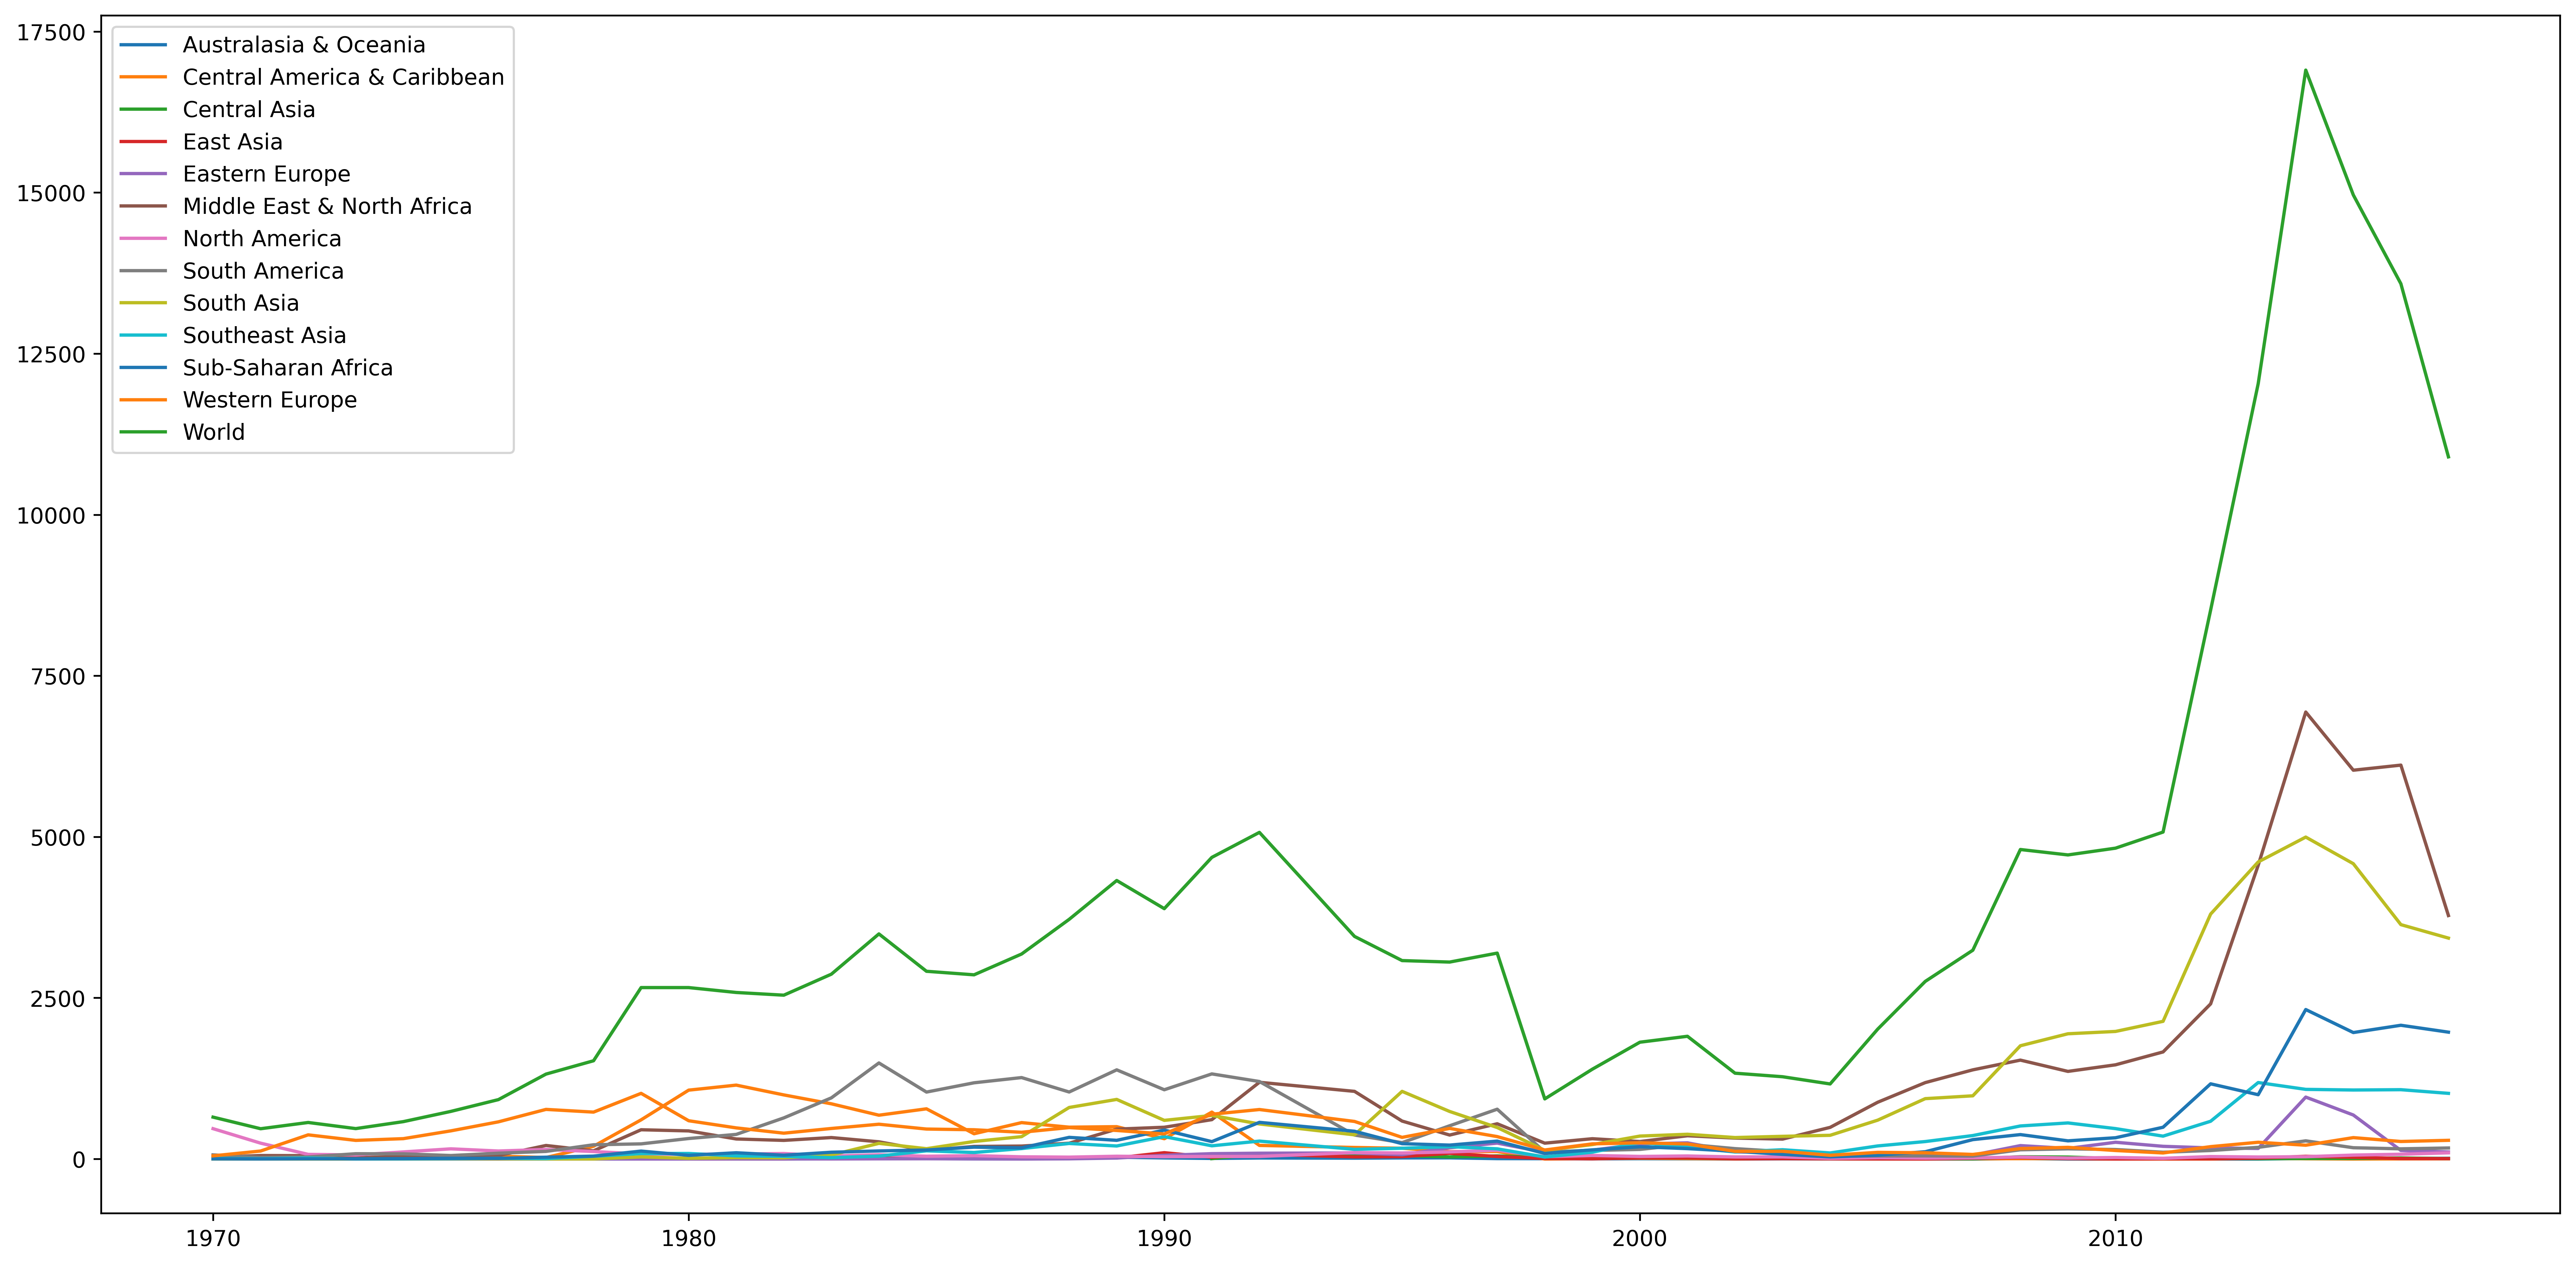

In [163]:
year = region_analysis.year
no_of_incident = region_analysis['no_of_inc']
regions = region_analysis.region.unique()
#yearly_chg = yearly_terrorism['Yearly Change']

plt.figure(figsize=(20,10), dpi=500)

for region in regions:
    selected_region = region_analysis[ region_analysis['region'] == region]
    plt.plot(selected_region.year, selected_region.no_of_inc, label = region)
    

year = yearly_terrorism.Year
no_of_incident = yearly_terrorism['No of incidents']
yearly_chg = yearly_terrorism['Yearly Change']

plt.plot(year, no_of_incident, label='World')

plt.legend()
plt.show()

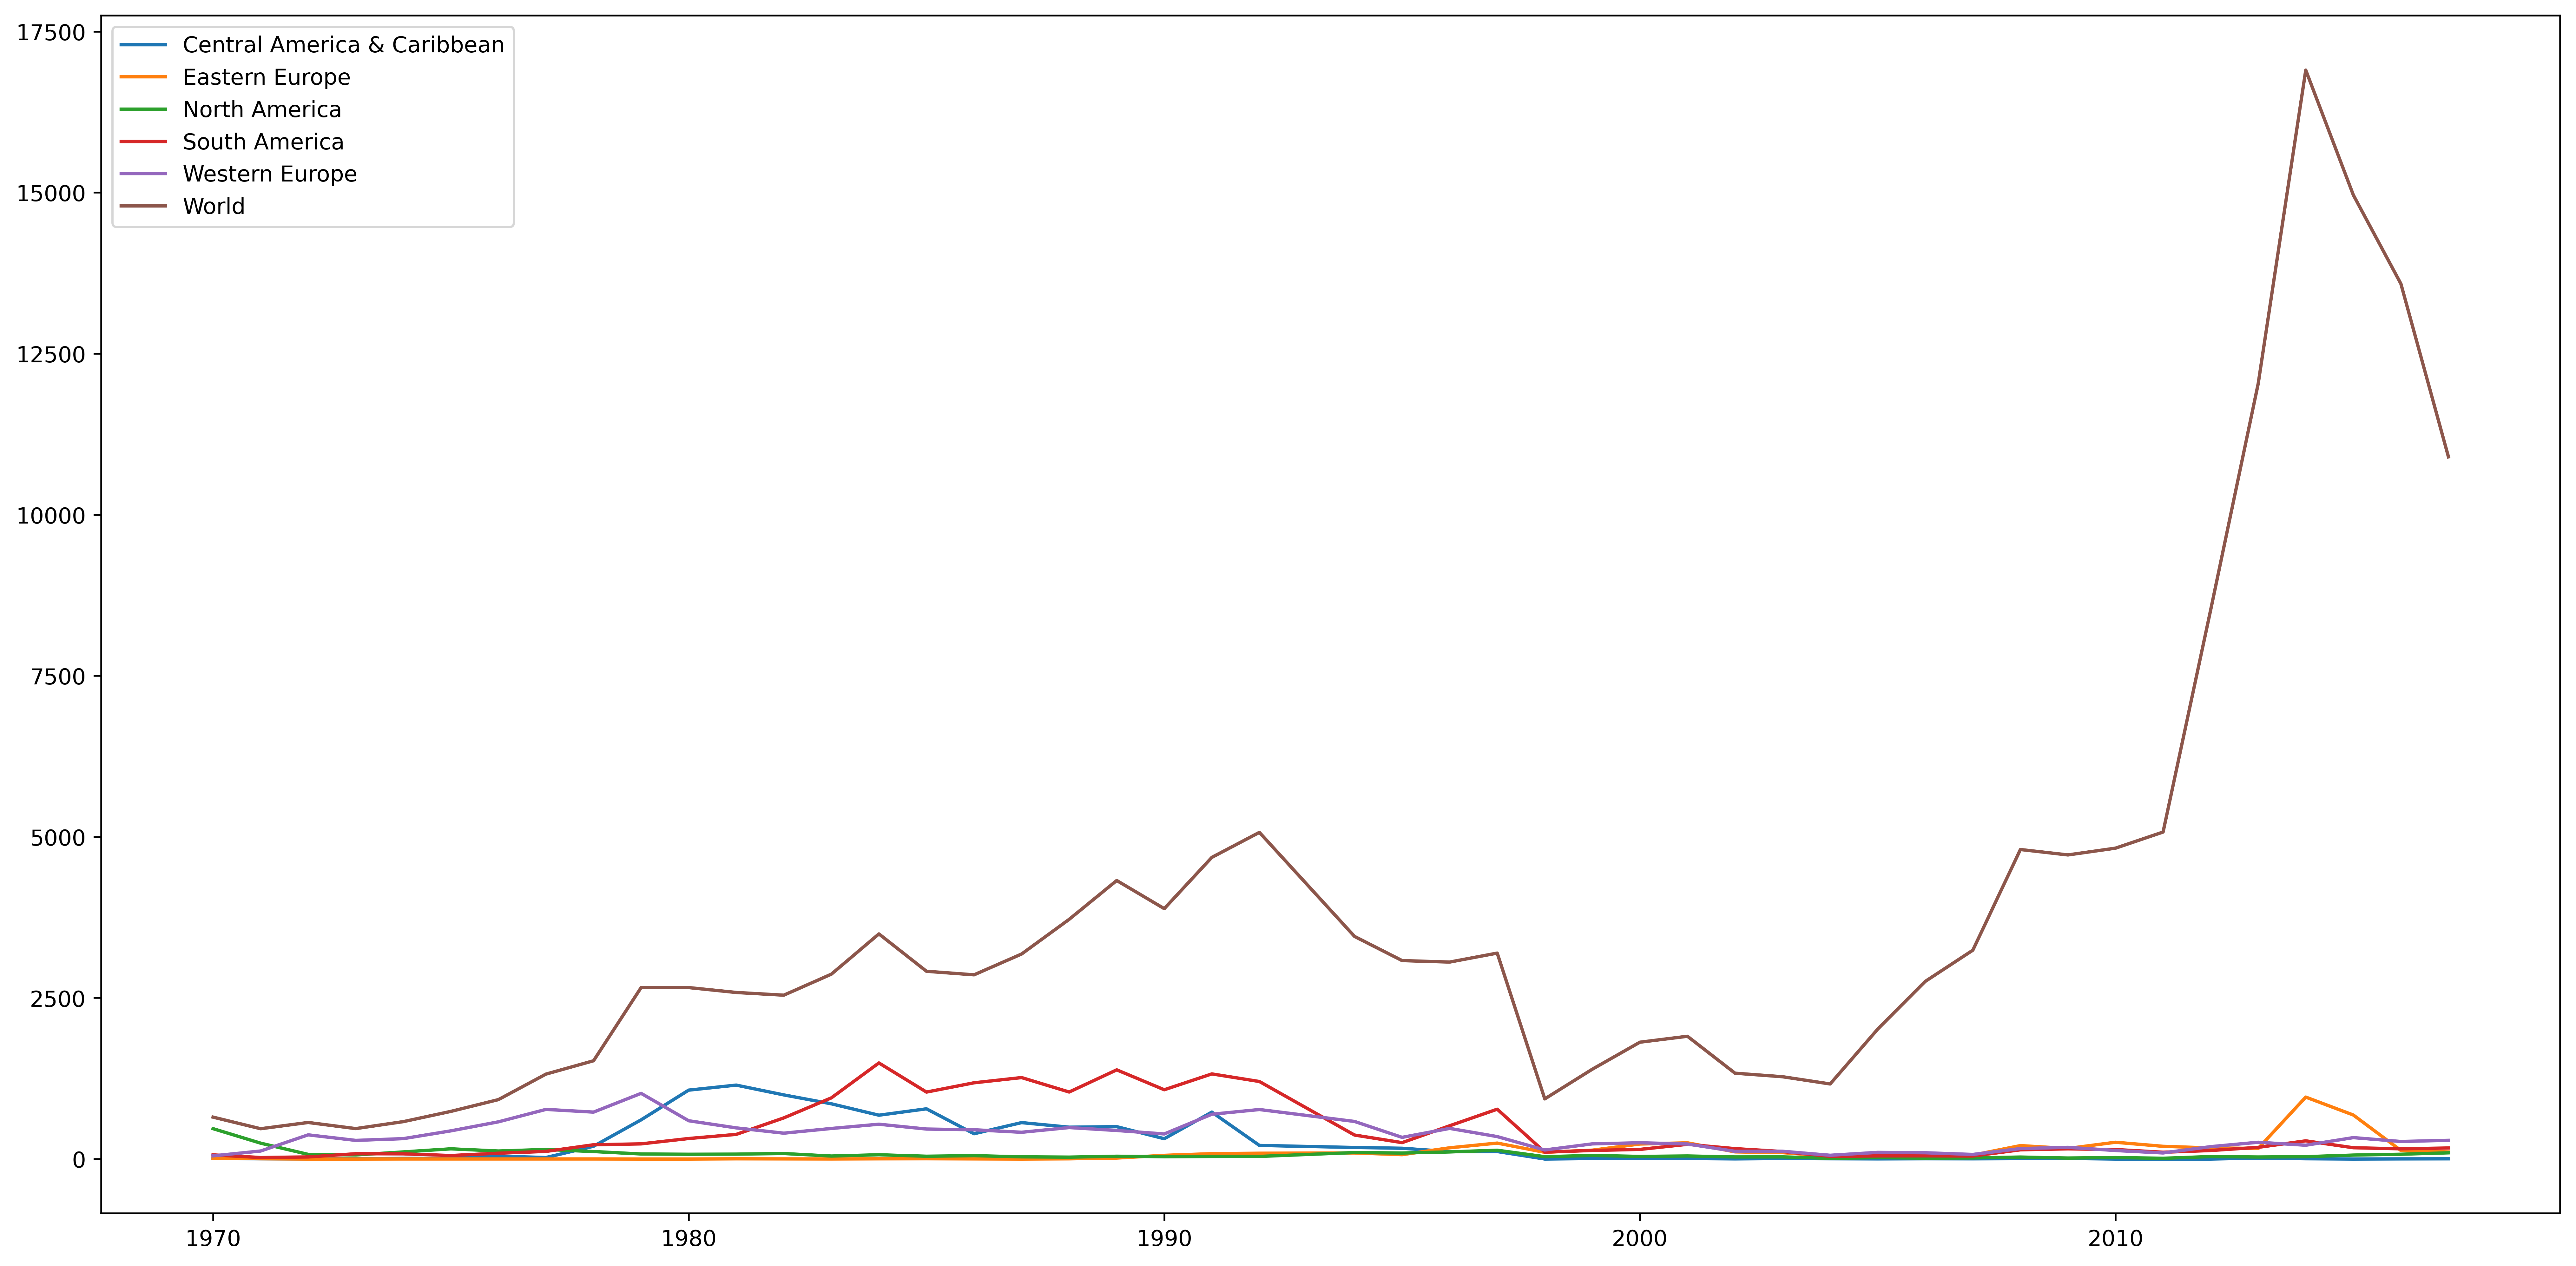

In [164]:
import re
year = region_analysis.year
no_of_incident = region_analysis['no_of_inc']
regions = region_analysis.region.unique()
#yearly_chg = yearly_terrorism['Yearly Change']

plt.figure(figsize=(20,10), dpi=500)

for region in regions:
    if 'asia' not in str.lower(region) and 'africa' not in str.lower(region):
        selected_region = region_analysis[ (region_analysis['region'] == region) & (~region_analysis['region'].str.contains('asia',flags=re.I, regex=True)) ]
        plt.plot(selected_region.year, selected_region.no_of_inc, label = region)

year = yearly_terrorism.Year
no_of_incident = yearly_terrorism['No of incidents']
yearly_chg = yearly_terrorism['Yearly Change']

plt.plot(year, no_of_incident, label='World')

plt.legend()
plt.show()

### Is the number of incidents and the number of casualties correlated?

In [165]:
inc_casu_corrl = terrorism_data[['eventid','iyear','imonth','iday','country_txt','country' ,'region', 'region_txt','nkill','nkillus','nkillter','nwound','nwoundus','nwoundte', 'success','suicide']]


In [166]:
inc_casu_corrl.head()

,eventid,iyear,imonth,iday,country_txt,country,region,region_txt,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,success,suicide
0,197000000001,1970,7,2,Dominican Republic,58,2,Central America & Caribbean,1.0,NaN,NaN,0.0,NaN,NaN,1,0
1,197000000002,1970,0,0,Mexico,130,1,North America,0.0,NaN,NaN,0.0,NaN,NaN,1,0
2,197001000001,1970,1,0,Philippines,160,5,Southeast Asia,1.0,NaN,NaN,0.0,NaN,NaN,1,0
3,197001000002,1970,1,0,Greece,78,8,Western Europe,NaN,NaN,NaN,NaN,NaN,NaN,1,0
4,197001000003,1970,1,0,Japan,101,4,East Asia,NaN,NaN,NaN,NaN,NaN,NaN,1,0


In [167]:
# lots of NaN

inc_casu_corrl.isna().sum()

eventid            0
iyear              0
imonth             0
iday               0
country_txt        0
country            0
region             0
region_txt         0
nkill          10313
nkillus        64446
nkillter       66958
nwound         16311
nwoundus       64702
nwoundte       69143
success            0
suicide            0
dtype: int64

In [168]:
inc_casu_corrl.fillna(0, inplace=True)
inc_casu_corrl.isna().sum()


C:\Users\rajchand\AppData\Local\Temp\ipykernel_25912\3471694257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inc_casu_corrl.fillna(0, inplace=True)


eventid        0
iyear          0
imonth         0
iday           0
country_txt    0
country        0
region         0
region_txt     0
nkill          0
nkillus        0
nkillter       0
nwound         0
nwoundus       0
nwoundte       0
success        0
suicide        0
dtype: int64

In [169]:
success_inc = inc_casu_corrl.loc[ inc_casu_corrl['success'] == 1]
fail_inc = inc_casu_corrl.loc[ inc_casu_corrl['success'] == 0]

In [170]:
success_inc_report =  success_inc.groupby('iyear', as_index=False).agg({'eventid':'count','nkill': 'sum','nwound': 'sum'})
fail_inc_report = fail_inc.groupby('iyear', as_index=False).agg({'eventid':'count','nkill': 'sum','nwound': 'sum'})

In [171]:
success_inc_report.rename(columns={'nkill':'no_killed','nwound':'no_wounded', 'iyear':'year', 'eventid':'no_of_inc'}, inplace=True)
fail_inc_report.rename(columns={'nkill':'no_killed','nwound':'no_wounded', 'iyear':'year', 'eventid':'no_of_inc'}, inplace=True)

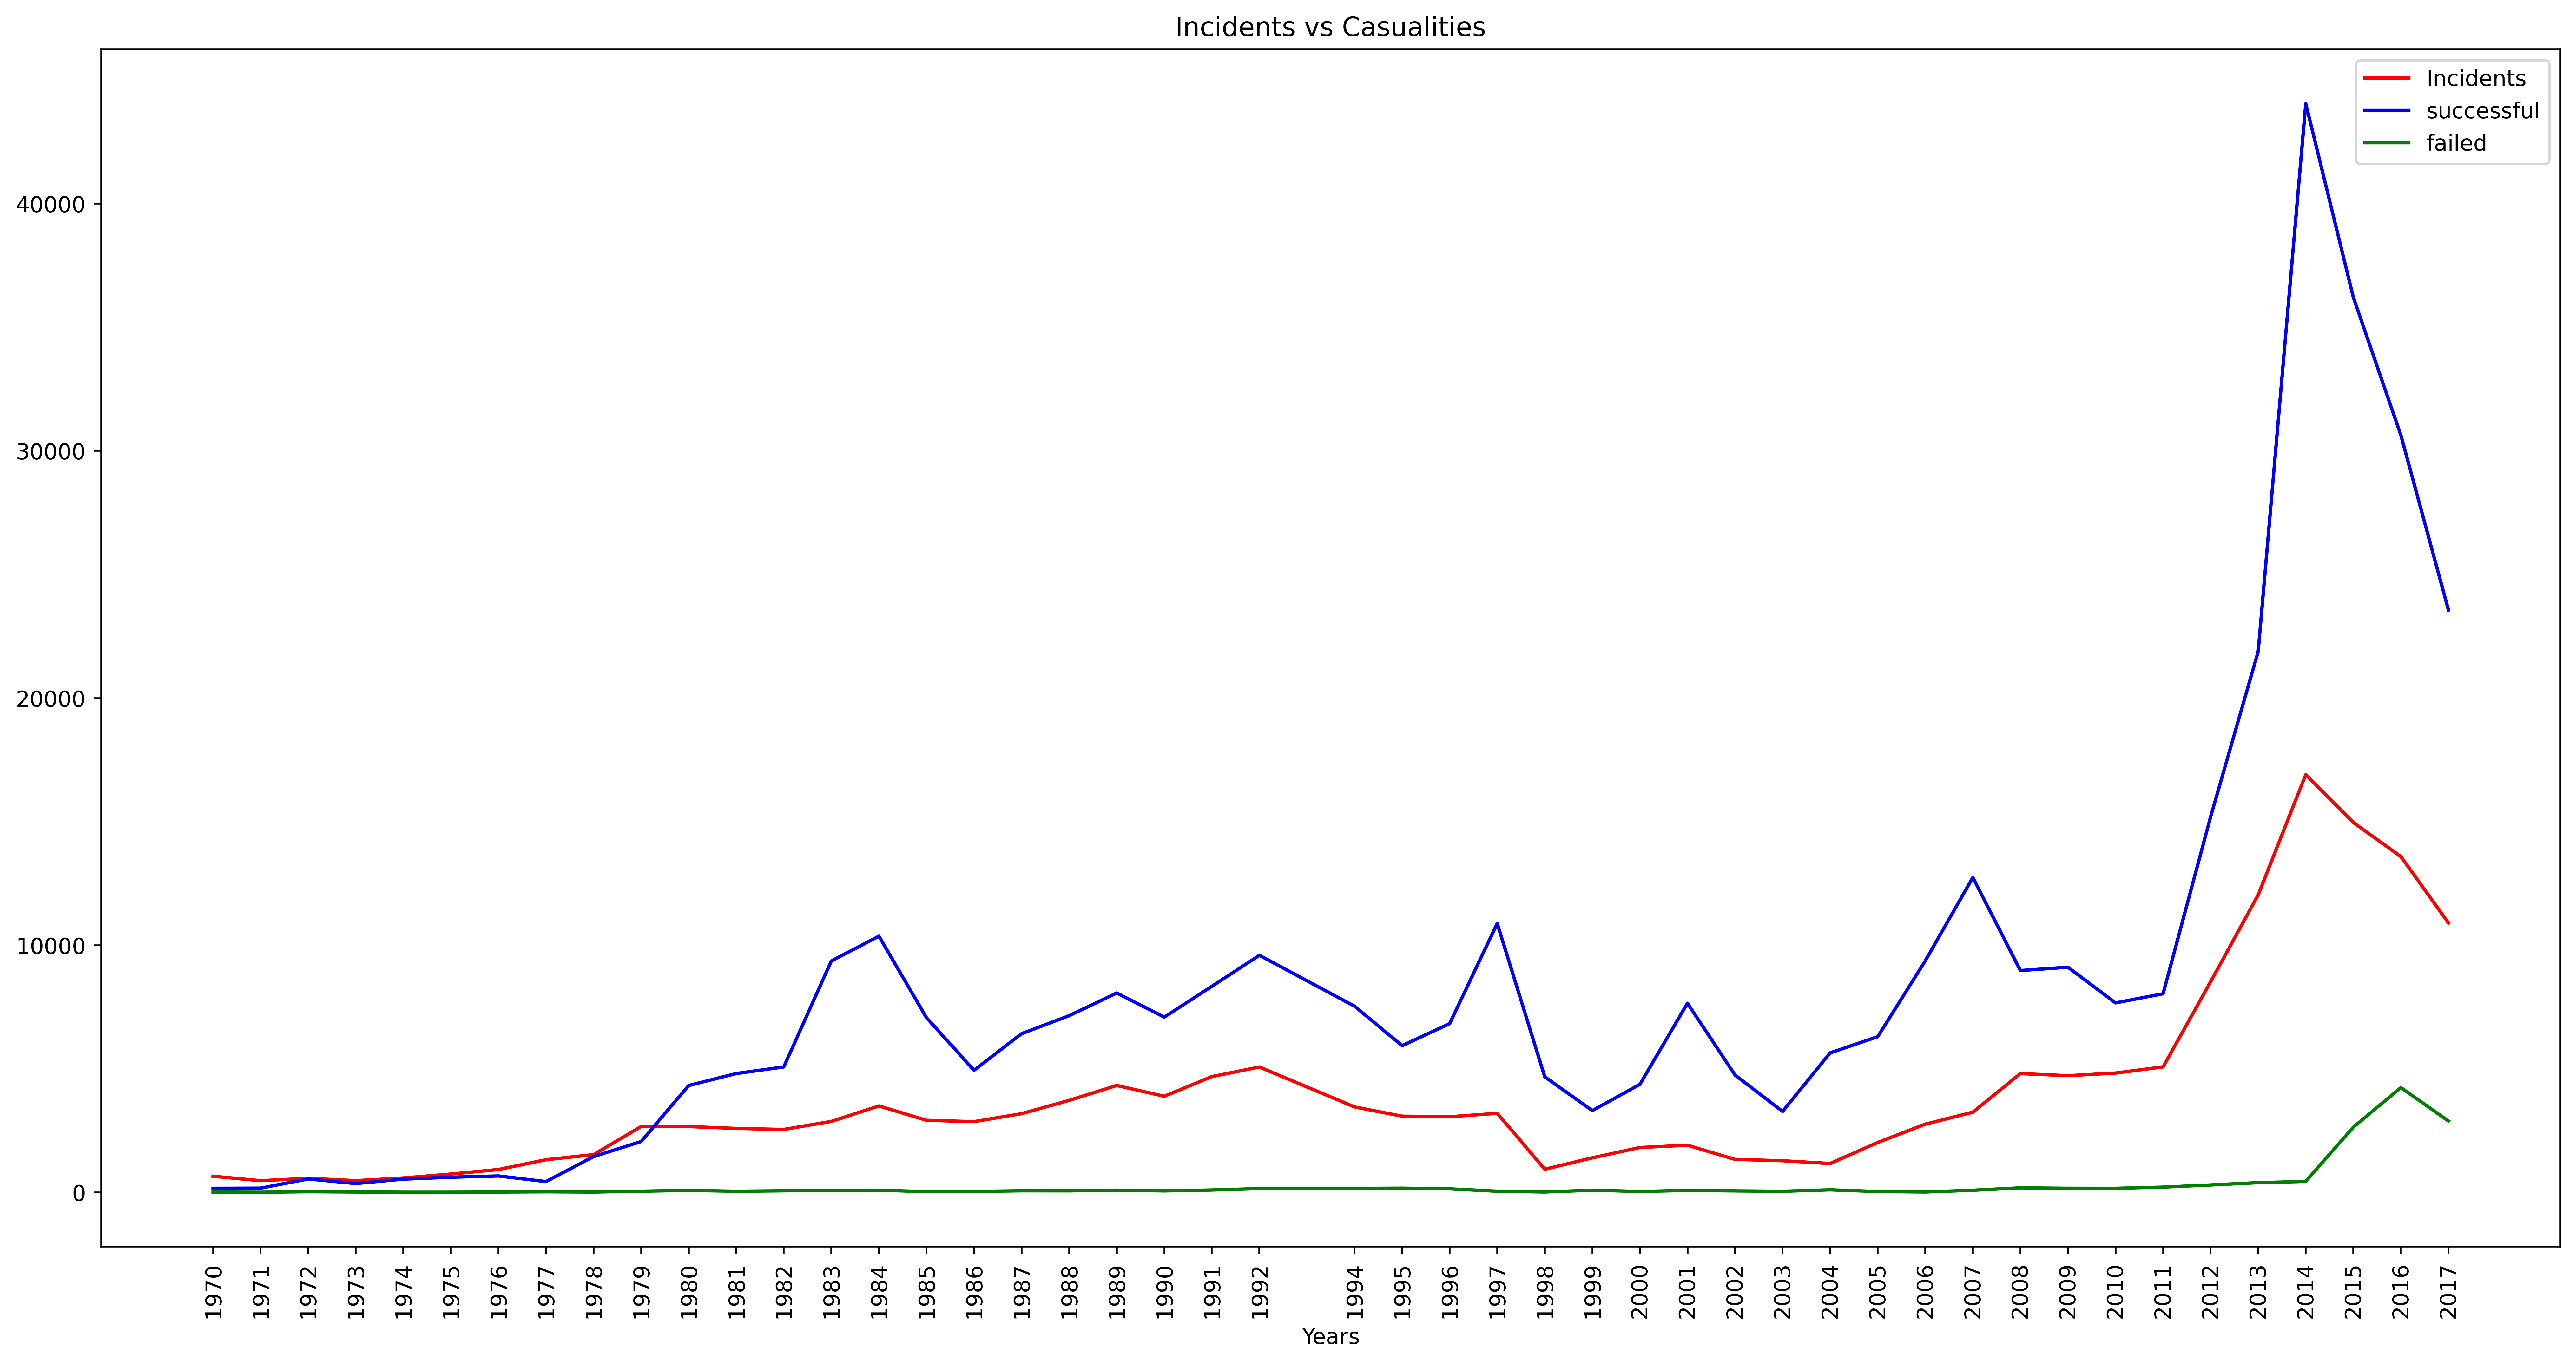

In [172]:
plt.figure(figsize=(20,10), dpi=500)

year = yearly_terrorism.Year
no_of_incident = yearly_terrorism['No of incidents']
plt.plot(year, no_of_incident, color='red', label='Incidents')

year = success_inc_report.year
no_killed = success_inc_report['no_killed']
plt.plot(year, no_killed, color='blue', label='successful')

year = fail_inc_report.year
no_killed = fail_inc_report['no_killed']
plt.plot(year, no_killed, color='green', label='failed')

plt.title('Incidents vs Casualities')
plt.xlabel('Years')

plt.xticks( year, rotation=90)

plt.legend()
plt.savefig('Incidents vs Casualities.png', dpi =1000)
plt.show()

### What are the most common methods of attacks?¶


In [173]:
inc_casu_corrl = terrorism_data[['eventid','iyear','imonth','iday','country_txt','country' ,'region', 'region_txt','nkill','nkillus','nkillter','nwound','nwoundus','nwoundte', 'success','suicide', 'attacktype1', 'attacktype2', 'attacktype3', 'attacktype1_txt', 'attacktype2_txt', 'attacktype3_txt']]

attack_analysis = inc_casu_corrl[['eventid','iyear','imonth','iday','country_txt','country','attacktype1', 'attacktype2', 'attacktype3', 'attacktype1_txt', 'attacktype2_txt', 'attacktype3_txt']]

In [174]:
attack_analysis


attacks = pd.concat(
    (attack_analysis.attacktype1_txt,
     attack_analysis.attacktype2_txt,
     attack_analysis.attacktype3_txt
    )
)

In [175]:
attacks.nunique()

9

In [176]:
attacks.dropna(inplace=True)
attacked = attacks.value_counts().sort_values(ascending=False).reset_index()

attacked

,index,0
0,Bombing/Explosion,88777
1,Armed Assault,46222
2,Assassination,19478
3,Facility/Infrastructure Attack,12238
4,Hostage Taking (Kidnapping),11690
5,Unknown,7279
6,Unarmed Assault,1046
7,Hostage Taking (Barricade Incident),1030
8,Hijacking,673


In [177]:
#attack_analysis.groupby(['year','attacktype1_txt'],as_index=False).agg(total_count=('attacktype1_txt','count')).sort_values(['country_txt','total_count'], ascending=[True, False])

In [178]:
attack_analysis.groupby(['iyear','attacktype1_txt'],as_index=False).agg(total_count=('attacktype1_txt','count')).sort_values(['iyear','total_count'], ascending=[True, False])

,iyear,attacktype1_txt,total_count
2,1970,Bombing/Explosion,333
3,1970,Facility/Infrastructure Attack,174
0,1970,Armed Assault,61
6,1970,Hostage Taking (Kidnapping),38
1,1970,Assassination,22
...,...,...,...
408,2017,Assassination,816
410,2017,Facility/Infrastructure Attack,751
414,2017,Unarmed Assault,101
412,2017,Hostage Taking (Barricade Incident),82


In [179]:
attack_type1 = attack_analysis[['iyear', 'attacktype1_txt']]

attack_type2 = attack_analysis[['iyear', 'attacktype2_txt']]
attack_type2.rename(columns={'attacktype2_txt':'attacktype1_txt'}, inplace=True)

attack_type3 = attack_analysis[['iyear', 'attacktype3_txt']]
attack_type3.rename(columns={'attacktype3_txt':'attacktype1_txt'}, inplace=True)

attacks = pd.concat(
    (attack_type1,
     attack_type2,
     attack_type3
    )
)

C:\Users\rajchand\AppData\Local\Temp\ipykernel_25912\1679603952.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attack_type2.rename(columns={'attacktype2_txt':'attacktype1_txt'}, inplace=True)
C:\Users\rajchand\AppData\Local\Temp\ipykernel_25912\1679603952.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attack_type3.rename(columns={'attacktype3_txt':'attacktype1_txt'}, inplace=True)


In [180]:
#attacks.drop_duplicates(keep='first', inplace=True)

In [181]:
attacks

,iyear,attacktype1_txt
0,1970,Assassination
1,1970,Hostage Taking (Kidnapping)
2,1970,Assassination
3,1970,Bombing/Explosion
4,1970,Facility/Infrastructure Attack
...,...,...
181686,2017,NaN
181687,2017,NaN
181688,2017,NaN
181689,2017,NaN


In [182]:
attacks = attacks.groupby(['iyear','attacktype1_txt']).agg(total_count=('attacktype1_txt','count')).reset_index()
attacks.sort_values('total_count', ascending=False)
#attacks

,iyear,attacktype1_txt,total_count
384,2014,Bombing/Explosion,8848
393,2015,Bombing/Explosion,7694
402,2016,Bombing/Explosion,7147
375,2013,Bombing/Explosion,6699
366,2012,Bombing/Explosion,5088
...,...,...,...
14,1971,Hostage Taking (Barricade Incident),1
33,1973,Unknown,1
296,2004,Hijacking,1
47,1975,Hijacking,1


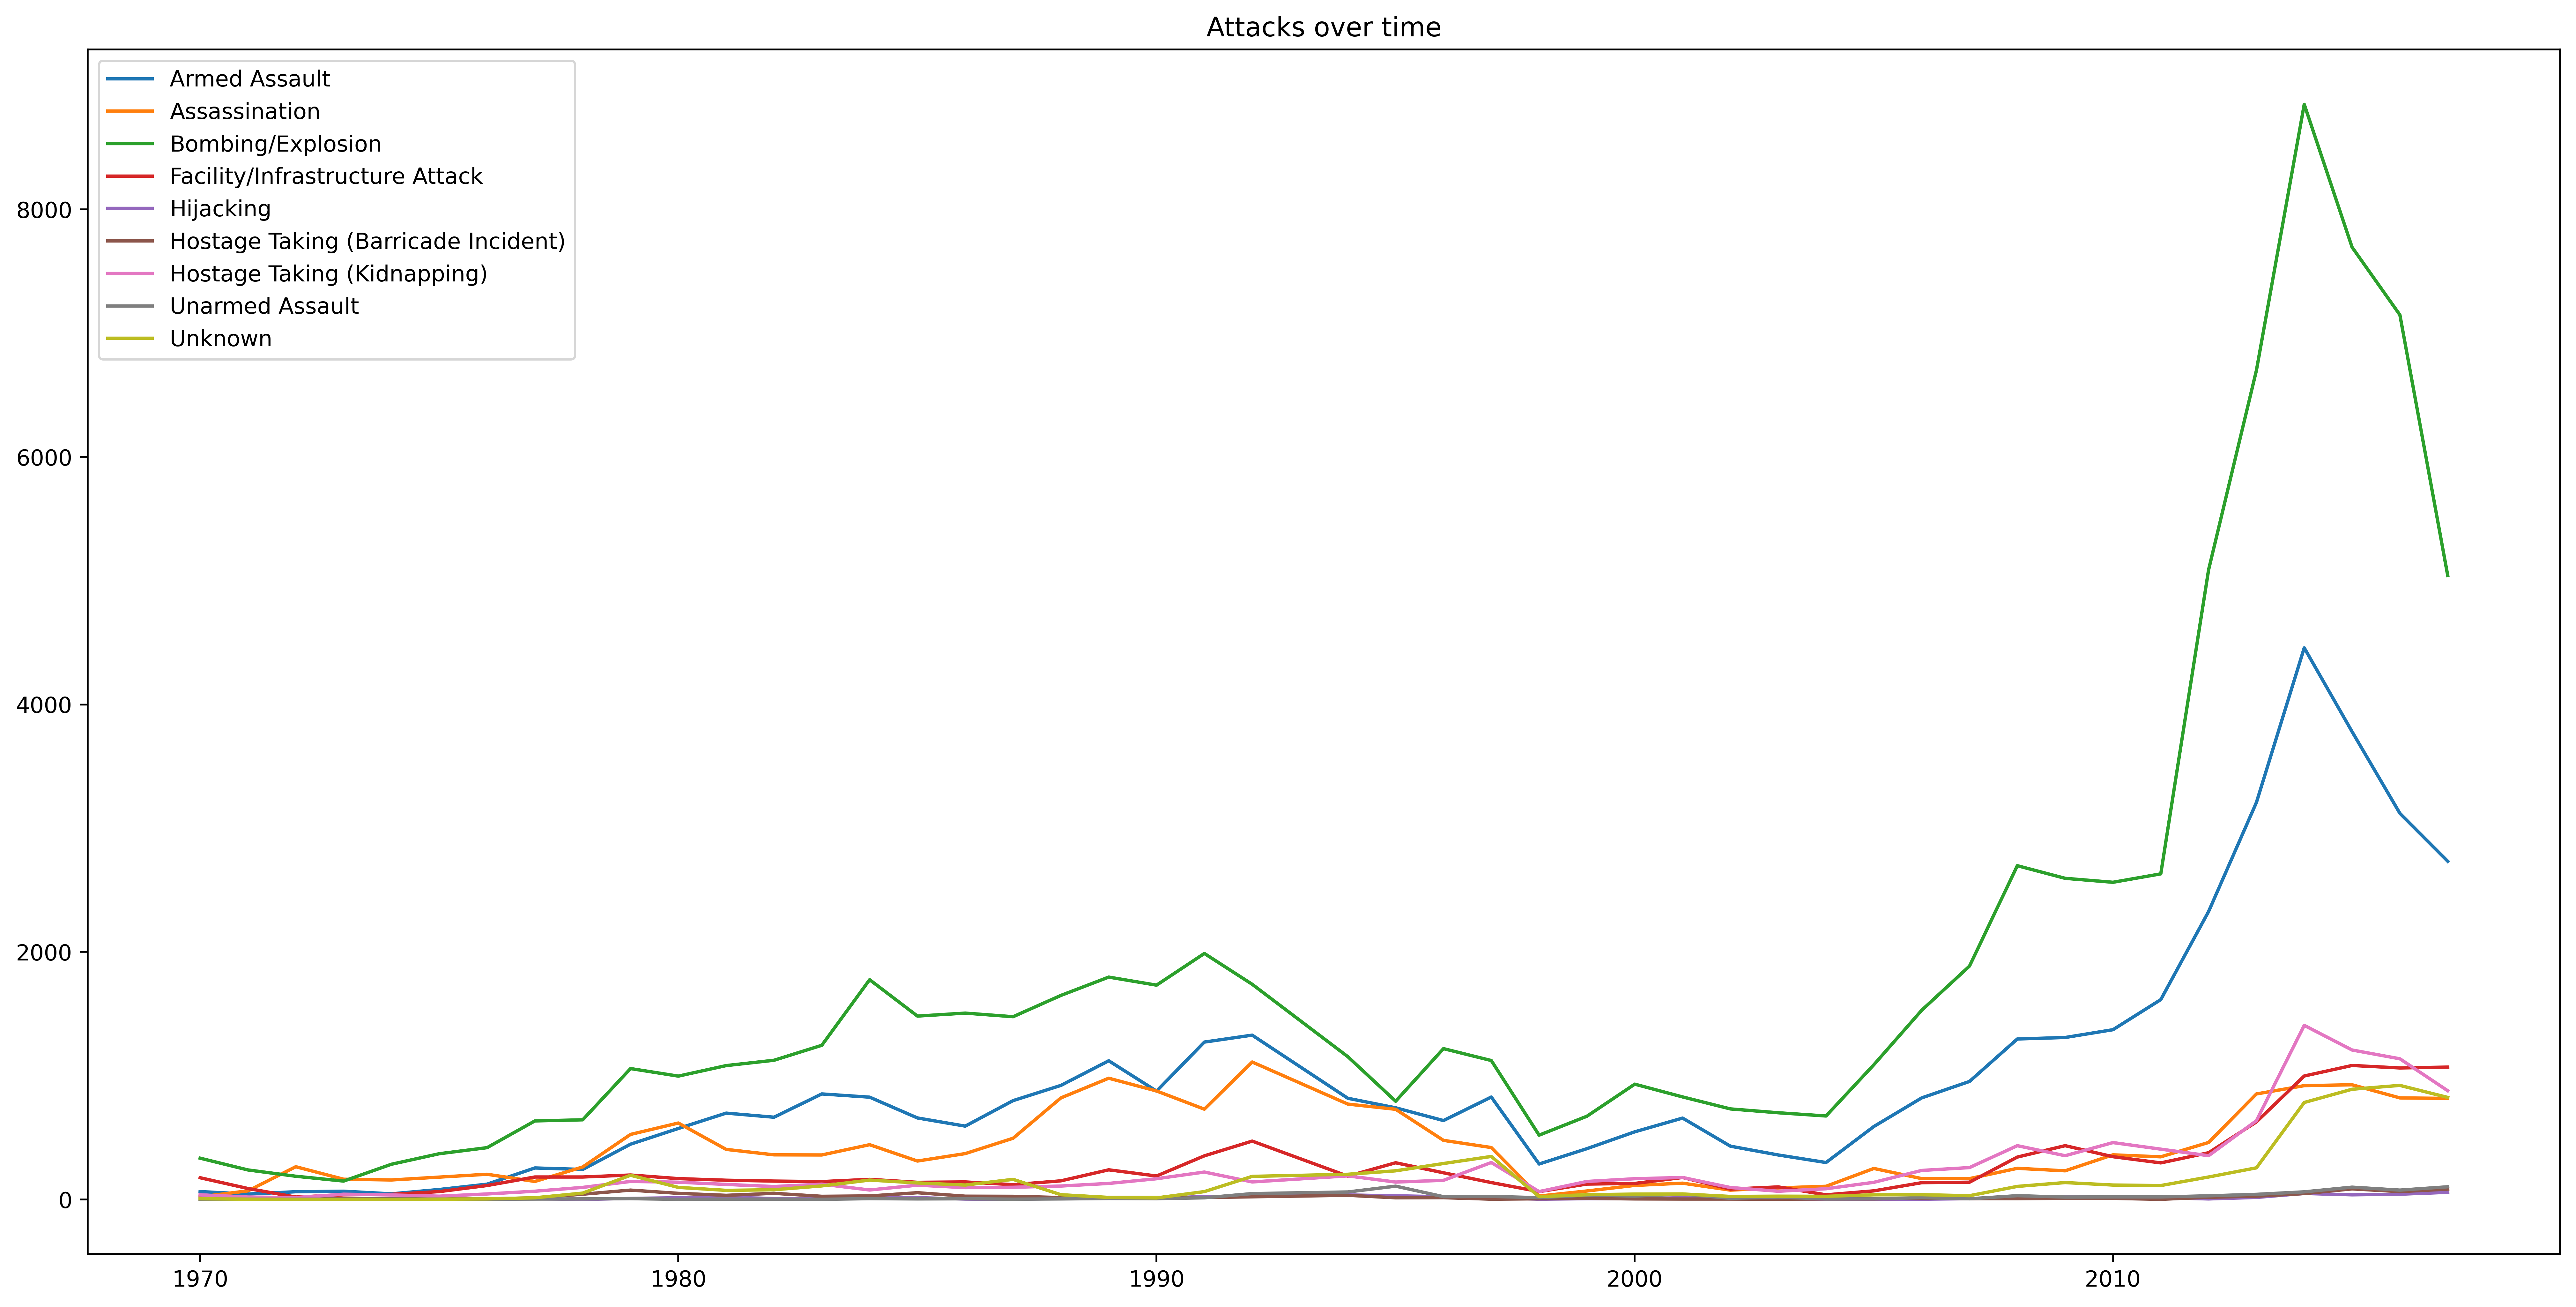

In [310]:
types = attacks.attacktype1_txt.unique()
#yearly_chg = yearly_terrorism['Yearly Change']

plt.figure(figsize=(20,10), dpi=500)

for atk_typ in types:
    selected_attack = attacks[ attacks['attacktype1_txt'] == atk_typ]
    plt.plot(selected_attack.iyear, selected_attack.total_count, label = atk_typ)

plt.title('Attacks over time')
plt.legend()
plt.show()

#### Converting date format

In [305]:
test_data = terrorism_data[['iyear','imonth','iday']]

In [306]:
test_data.rename(columns={'iyear':'year', 'imonth':'month', 'iday':'day'}, inplace=True)

C:\Users\rajchand\AppData\Local\Temp\ipykernel_25912\2606349994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.rename(columns={'iyear':'year', 'imonth':'month', 'iday':'day'}, inplace=True)


In [307]:
test_data['datestamp'] = pd.to_datetime(test_data[['year','month','day']],errors='ignore')
#test_data['datestamp'].dt.strftime('%m/%d/%Y')

test_data['datestamp'] = pd.to_datetime(test_data['datestamp'], format='%Y%m%d',errors='coerce')
test_data

C:\Users\rajchand\AppData\Local\Temp\ipykernel_25912\4111421989.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['datestamp'] = pd.to_datetime(test_data[['year','month','day']],errors='ignore')
C:\Users\rajchand\AppData\Local\Temp\ipykernel_25912\4111421989.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['datestamp'] = pd.to_datetime(test_data['datestamp'], format='%Y%m%d',errors='coerce')


,year,month,day,datestamp
0,1970,7,2,1970-07-02
1,1970,0,0,NaT
2,1970,1,0,NaT
3,1970,1,0,NaT
4,1970,1,0,NaT
...,...,...,...,...
181686,2017,12,31,2017-12-31
181687,2017,12,31,2017-12-31
181688,2017,12,31,2017-12-31
181689,2017,12,31,2017-12-31


In [308]:
#test_data['datestamp'] = pd.to_datetime(test_data['datestamp'])
test_data['datestamp'] = test_data['datestamp'].dt.strftime('%Y/%m/%d')
test_data['datestamp'] = test_data['datestamp'].fillna('2023/12/31')

C:\Users\rajchand\AppData\Local\Temp\ipykernel_25912\1484228793.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['datestamp'] = test_data['datestamp'].dt.strftime('%Y/%m/%d')
C:\Users\rajchand\AppData\Local\Temp\ipykernel_25912\1484228793.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['datestamp'] = test_data['datestamp'].fillna('2023/12/31')


In [309]:
test_data.to_csv('Dateformated.csv', columns=['year', 'month', 'day', 'datestamp'])